## Kernel Perceptron
***

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def feature_map(x: tuple) -> np.array:
    return np.array([x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2])


def quadratic_kernel(x1, x2):
    return np.dot(feature_map(x1), feature_map(x2))


def predict(x_i, X, y, alphas, theta_0):
    k_values = np.array([quadratic_kernel(x_i, point) for point in X])
    return np.sign(np.sum(alphas * y * k_values) + theta_0)

In [11]:
x = np.array([
    (0,0), (2,0), (1,1), (0,2), (3,3), 
    (4,1), (5,2), (1,4), (4,4), (5,5)
])

y = np.array([-1, -1, -1, -1, -1, 1, 1, 1, 1, 1])
alphas = np.array([1, 65, 11, 31, 72, 30, 0, 21, 4, 15])

In [12]:
n_samples = len(y)
theta = np.zeros(3)
theta_0 = 0

for i in range(n_samples):
    theta += alphas[i]*y[i]*feature_map(x[i])
    theta_0 += alphas[i]*y[i]
    
print("theta:", theta)
print("theta_0:", theta_0)    

theta: [ 21.       -22.627417  22.      ]
theta_0: -110


In [16]:
phi_x = np.apply_along_axis(feature_map, 1, x)
phi_x

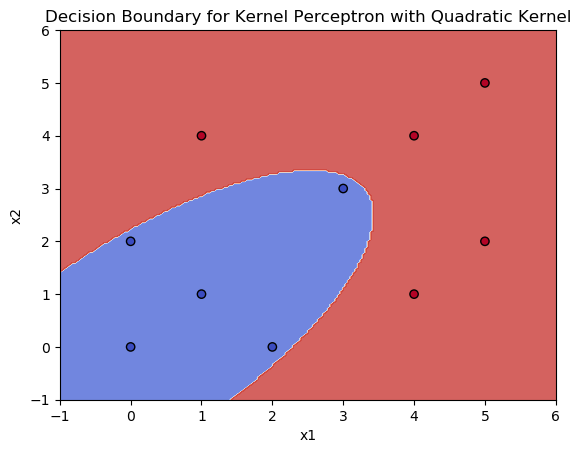

In [14]:

# Create a meshgrid
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200), 
    np.linspace(y_min, y_max, 200))

# Compute predictions for each point in the meshgrid
Z = np.array([
    predict(
        x_i=np.array([xi, yi]), 
        X=x, 
        y=y, 
        alphas=alphas,
        theta_0=theta_0
    ) for xi, yi in zip(
        np.ravel(xx), 
        np.ravel(yy)
    )
])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary for Kernel Perceptron with Quadratic Kernel')
plt.show()
